Para o exemplo da estimativa de preços de casas em Boston, usaremos as seguinte bibliotecas:
- pandas e matplotlib para plotagem de resultados
- xgboost e sklearn para modelos de regressão
- sklearn.datasets para o conjunto de dados
- numpy, math and random para geração de números aleatórios, funções matemáticas e manipulação de arrays

In [14]:
#Ignore errors not to polute the presentation
import warnings

warnings.filterwarnings("ignore")
#Introduce the basic package of data science.
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBRegressor
#Introduce machine learning, preprocessing, model selection, and evaluation indicators.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
#Import the Boston dataset used this time.
from sklearn.datasets import load_boston
#Introduce algorithms.
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression, ElasticNet
#Compared with SVC, it is the regression form of SVM.
from sklearn.svm import SVR
#Integrate algorithms.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import math
import random
import numpy

Após a importação das bibliotecas, carregamos o conjunto de dados de trabalho e imprimimos os atributos dos imóveis

In [15]:
#Load the Boston house price data set.
boston = load_boston()
#x features, and y labels.
x = boston.data
y = boston.target
#Display related attributes.
print('Feature column name')
print(boston.feature_names)
print("Sample data volume: %d, number of features: %d" % x.shape)
print("Target sample data volume: %d" % y.shape[0])

Feature column name
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Sample data volume: 506, number of features: 13
Target sample data volume: 506


A biblioteca Pandas pode ser então utilizada para processar os elementos e tabulá-los.
- CRIM: urban per capita crime rate
- ZN: proportion of residential land exceeds 25,000 square feet
- INDUS: proportion of non-retail commercial land in a town
- CHAS: Charles river empty variable (1 indicates that the boundary is a river; otherwise, the value is 0)
- NOX: Nitric oxide concentration
- RM: average number of rooms in a house
- AGE: proportion of private houses completed before 1940
- DIS: weighted distance to the five central regions of Boston
- RAD: proximity index of a radial highway
- TAX: full value property tax rate of USD 10,000
- PTRATIO: proportion of teachers and students in urban areas
- target: average price of private houses, unit: USD 1,000

In [16]:
x = pd.DataFrame(boston.data, columns=boston.feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Também podemos visualizar a distribuição dos preços destes imóveis (y) em milhares de dólares

Text(0.5, 0, 'Average Price of Houses (x USD 1,000)')

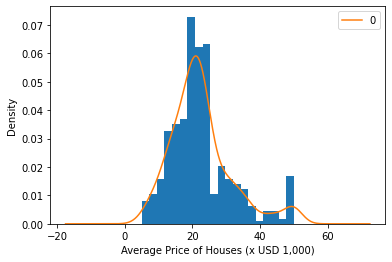

In [17]:
fig, ax = plt.subplots(ncols=1)
ax.hist(tuple(y), density=True, bins=20)
pd.DataFrame(y).plot(kind='density', ax=ax)
ax.set_xlabel("Average Price of Houses (x USD 1,000)")

Para treinar um modelo, podemos separar o conjunto de dados em dois conjuntos:
- um para treinamento
- outro para teste

In [18]:
#Segment the data.
# 80% goes into the training set
# 20% goes into the testing set
# random_state is a shuffling seed (fixed for reproducible results)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28)
print("Before:")
x_train[0:10]

Before:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
318,0.40202,0.0,9.90,0.0,0.5440,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36
72,0.09164,0.0,10.81,0.0,0.4130,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
389,8.15174,0.0,18.10,0.0,0.7000,5.390,98.9,1.7281,24.0,666.0,20.2,396.90,20.85
410,51.13580,0.0,18.10,0.0,0.5970,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
303,0.10000,34.0,6.09,0.0,0.4330,6.982,17.7,5.4917,7.0,329.0,16.1,390.43,4.86
103,0.21161,0.0,8.56,0.0,0.5200,6.137,87.4,2.7147,5.0,384.0,20.9,394.47,13.44
313,0.26938,0.0,9.90,0.0,0.5440,6.266,82.8,3.2628,4.0,304.0,18.4,393.39,7.90
41,0.12744,0.0,6.91,0.0,0.4480,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84
279,0.21038,20.0,3.33,0.0,0.4429,6.812,32.2,4.1007,5.0,216.0,14.9,396.90,4.85
381,15.87440,0.0,18.10,0.0,0.6710,6.545,99.1,1.5192,24.0,666.0,20.2,396.90,21.08


Após a seleção dos conjuntos de treinamento e teste, precisamos fazer a normalização dos dados.

CUIDADO: neste caso a normalização dos dados de teste é feita a partir dos valores médios e variância dos dados de treinamento

Se a amostra de treinamento não for representativa, a modelagem terá problemas.

In [19]:
# Store original dataset values before standardizing the data
x_train_og = x_train
x_test_og = x_test

# Standardize the data set.
# StandardScaler removes the mean and scales to unit variance.
# z = (x - u) / s
ss = StandardScaler()
x_train = ss.fit_transform(x_train)  # Fit the data and transform to scale the training set
x_test = ss.transform(x_test)  # Performs standardization on the test set
# WARNING:
# the ss.transform() standardization use the mean values and variance from the training set from ss.fit_transform()
# if the mean and variance of the test set is dissimilar to the training set, bad things can happen
print("After:")
x_train[0:10]

After:


array([[-0.35703125, -0.49503678, -0.15692398, -0.27808871, -0.08506122,
         0.10913896, -0.02703674, -0.12950171, -0.62334023, -0.60513013,
        -0.01188637,  0.42050162, -0.29153411],
       [-0.39135992, -0.49503678, -0.02431196, -0.27808871, -1.22336912,
        -0.34123025, -2.11662399,  0.69245476, -0.62334023, -0.59917319,
         0.35398749,  0.37314392, -0.97290358],
       [ 0.5001037 , -0.49503678,  1.03804143, -0.27808871,  1.27048101,
        -1.30021833,  1.08811336, -0.97469105,  1.69873864,  1.55127998,
         0.81132983,  0.4391143 ,  1.18523567],
       [ 5.25422906, -0.49503678,  1.03804143, -0.27808871,  0.37547556,
        -0.77881296,  1.12680942, -1.12228535,  1.69873864,  1.55127998,
         0.81132983, -3.90347699, -0.32672881],
       [-0.39043528,  0.90727818, -0.71214571, -0.27808871, -1.04958165,
         0.96157281, -1.76835945,  0.78819667, -0.2750284 , -0.45620678,
        -1.06377374,  0.36785748, -1.0658176 ],
       [-0.37809099, -0.495036

Após preparados os conjuntos de dados para treinamento, podemos treinar modelos diversos.
Para comparar o desempenho dos diferentes modelos, é utilizado o escore R2, que se aproxima de 1 quanto

In [20]:
#Set the regression model name and instantiate the model
regression_models = {
    'LinerRegression': LinearRegression(),
    'Ridge': RidgeCV(alphas=(0.001, 0.1, 1), cv=3),
    'Lasso': LassoCV(alphas=(0.001, 0.1, 1), cv=5),
    'Random Forrest': RandomForestRegressor(n_estimators=10),
    'GBDT': GradientBoostingRegressor(n_estimators=30),
    'Support Vector Regression': SVR(),
    'ElasticNet': ElasticNet(alpha=0.001, max_iter=10000),
    'XgBoost': XGBRegressor()
}


# cv is the cross-validation idea here.
# Output the R2 scores of all regression models.
# Define the R2 scoring function.
def R2(model, x_train, x_test, y_train, y_test):
    model_fitted = model.fit(x_train, y_train)
    y_pred = model_fitted.predict(x_test)
    score = r2_score(y_test, y_pred)
    #print("Predito:\n", y_pred, "\nMedido:\n", y_test)
    return score


#Traverse all models to score.
for (name, model) in regression_models.items():
    score = R2(model, x_train, x_test, y_train, y_test)
    print("{}: {:.6f}".format(name, score.mean()))

LinerRegression: 0.564115
Ridge: 0.563673
Lasso: 0.564049
Random Forrest: 0.722083
GBDT: 0.715252
Support Vector Regression: 0.517260
ElasticNet: 0.563992
XgBoost: 0.759977


E agora se a seleção dos dados para treinamento e teste não for bem feita


In [21]:
x_test_example = x_train_og[:10].loc[x_train_og[:10]["ZN"] > 0]
x_train_example = x_train_og[:10].loc[x_train_og[:10]["ZN"] < 1]
print("Before standardization")
print("xtraining\n", x_train_example, "\n\n", "xtesting\n", x_test_example)

y_test_example = [y_train[:10][4], y_train[:10][8]]
y_train_example = [*y_train[:4], *y_train[5:8], *y_train[9:10]]
#print(y_train[:10])
#print(y_train_example)
#print(y_test_example)
ss1 = StandardScaler()
x_train_example = ss1.fit_transform(x_train_example)  # Fit the data and transform to scale the training set
x_test_example = ss1.transform(x_test_example)  # Performs standardization on the test set
#print("\n\nAfter standardization")
#print("xtraining\n", x_train_example, "\n\n", "xtesting\n", x_test_example)

print("\n\n")
#Traverse all models to score.
for (name, model) in regression_models.items():
    score = R2(model, x_train_example, x_test_example, y_train_example, y_test_example)
    print("{}: {:.6f}".format(name, score.mean()))

Before standardization
xtraining
          CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
318   0.40202  0.0   9.90   0.0  0.544  6.382   67.2  3.5325   4.0  304.0   
72    0.09164  0.0  10.81   0.0  0.413  6.065    7.8  5.2873   4.0  305.0   
389   8.15174  0.0  18.10   0.0  0.700  5.390   98.9  1.7281  24.0  666.0   
410  51.13580  0.0  18.10   0.0  0.597  5.757  100.0  1.4130  24.0  666.0   
103   0.21161  0.0   8.56   0.0  0.520  6.137   87.4  2.7147   5.0  384.0   
313   0.26938  0.0   9.90   0.0  0.544  6.266   82.8  3.2628   4.0  304.0   
41    0.12744  0.0   6.91   0.0  0.448  6.770    2.9  5.7209   3.0  233.0   
381  15.87440  0.0  18.10   0.0  0.671  6.545   99.1  1.5192  24.0  666.0   

     PTRATIO       B  LSTAT  
318     18.4  395.21  10.36  
72      19.2  390.91   5.52  
389     20.2  396.90  20.85  
410     20.2    2.60  10.11  
103     20.9  394.47  13.44  
313     18.4  393.39   7.90  
41      17.9  385.41   4.84  
381     20.2  396.90  21.08   



Como mostrado, a má seleção das amostras de teste podem fazer o modelo divergir, afastando-o do resultado esperado.

De volta ao caso normal:

In [22]:
#Traverse all models to score.
for (name, model) in regression_models.items():
    score = R2(model, x_train, x_test, y_train, y_test)
    print("{}: {:.6f}".format(name, score.mean()))

LinerRegression: 0.564115
Ridge: 0.563673
Lasso: 0.564049
Random Forrest: 0.661704
GBDT: 0.718741
Support Vector Regression: 0.517260
ElasticNet: 0.563992
XgBoost: 0.759977


Como dito, o escore R2 se aproxima de 1 quanto mais próximos forem o resultado aproximado pelo modelo 'model.predict(x_test)' e o resultado medido 'y_test'
Podemos visualizar o desempenho dos diferentes modelos de regressão

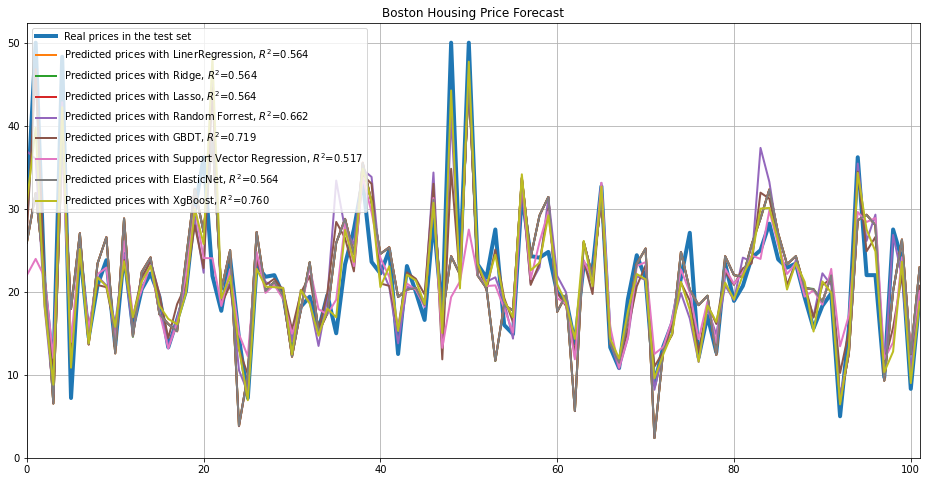

In [23]:
plt.figure(figsize=(16, 8), facecolor='w')
##Perform visualization.
ln_x_test = range(len(x_test))

#Draw known prices in the test set
plt.plot(ln_x_test, y_test, lw=4, label=u'Real prices in the test set')

#Set legend, grid, plot title and limit x-axis range
plt.grid(True)
plt.title(u"Boston Housing Price Forecast")
plt.xlim(0, 101)

# Plot lines for each model prediction
for (name, model) in regression_models.items():
    y_predict = model.predict(x_test)
    plt.plot(ln_x_test, y_predict, lw=2,
             label=u'Predicted prices with %s, $R^2$=%.3f' % (name, r2_score(y_test, model.predict(x_test))))
plt.legend(loc='upper left')

plt.show()

Podemos escolher um dos modelos acima para tentar ajustar seus hiperparâmetros e melhorar o modelo.
Neste caso, usaremos o SVR (Support Vector Regression)

In [24]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],  # kernel function
    'C': [0.1, 0.5, 0.9, 1, 5],  # SVR regularization factor
    'gamma': [0.001, 0.01, 0.1, 1]
    # 'rbf', 'poly' and 'sigmoid' kernel function coefficient, which affects the model performance
}
#Use grid search and perform cross validation.
model = GridSearchCV(SVR(), param_grid=parameters, cv=3)
model.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 0.5, 0.9, 1, 5],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

O SVR aceita diferentes tipos de kernels, capazes de produzirem regressões mais adequadas a diferentes tipos de funções

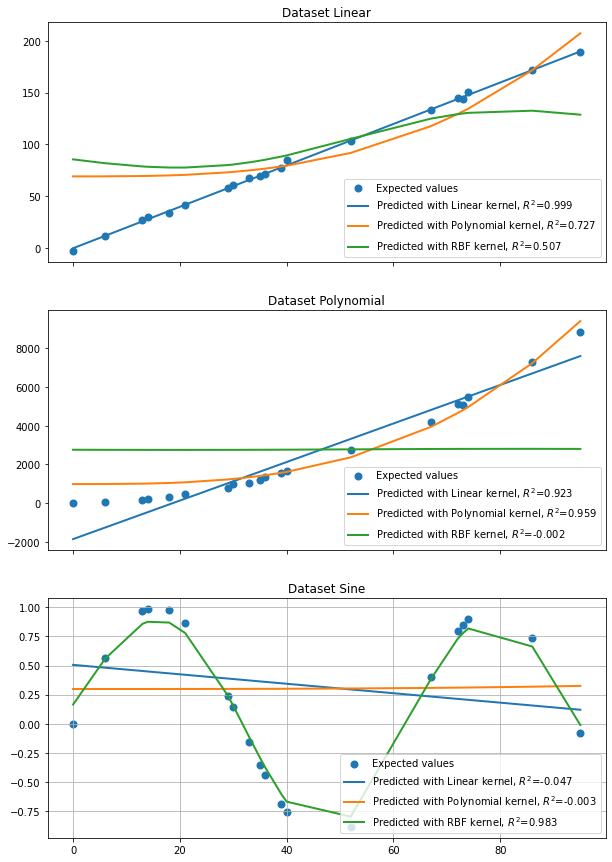

In [25]:
# Instantiate SVR with different kernels
svrs = {"Linear": SVR(kernel="linear"),
        "Polynomial": SVR(kernel="poly"),
        "RBF": SVR(kernel="rbf"),
        }


# Create a dataset with 100 samples of a given function and split into test and train sets
def dataset(func, samples=100):
    x_train = list(range(samples))
    y_train = list(map(lambda x: func(x), x_train))
    x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=28)
    return x_train, x_test, y_train, y_test


# Create 3 datasets with 2*x+noise, x^2-x*noise+noise, sin(x/10)
datasets = {
    "Linear": dataset(lambda x: x * 2 - random.gauss(0, 2)),
    "Polynomial": dataset(lambda x: x ** 2 - x * random.gauss(0, 2) + random.gauss(0, 3)),
    "Sine": dataset(lambda x: math.sin(x / 10)),
}

def test_svr_kernels(datasets):
    # for each kernel and dataset, train the model, predict and plot the results in a grid
    fig, axis = plt.subplots(nrows=3, sharex=True, figsize=(10, 15))

    #Set legend, grid, plot title and limit x-axis range
    plt.grid(True)
    plt.title("Test different SVR kernels with different datasets")

    i = 0
    for (datasettype, dataset) in datasets.items():
        x_train = dataset[0]
        y_train = dataset[2]
        x_test = dataset[1]
        y_test = dataset[3]
        axis[i].scatter(*list(zip(*sorted(zip(x_test, y_test)))), lw=2, label=u'Expected values')
        axis[i].set_title("Dataset %s" % datasettype)
        # Plot lines for each model prediction
        for (svrkernel, svr) in svrs.items():
            svr.fit(numpy.array([x_train]).reshape(-1, 1), numpy.array([y_train]).reshape(-1, 1))
            y_predict = svr.predict(numpy.array([x_test]).reshape(-1, 1))
            score = r2_score(y_test, y_predict)

            #*list(zip(*sorted(zip(x_test,y_test))))
            # is a trick to merge the x and y lists into a single lists with (x,y) pairs,
            # then sort them, and finally split back into separate lists of x and y
            # If values passed to axis.plot or matplotlib.pyplot.plot are not sorted, incorrect lines will be drawn
            axis[i].plot(*list(zip(*sorted(zip(x_test, y_predict)))), lw=2,
                         label=u'Predicted with %s kernel, $R^2$=%.3f' % (svrkernel, score))
            axis[i].legend(loc='lower right')
        # Change to the next image
        i += 1

    plt.show()

# Visually show how different kernels fit to different data
test_svr_kernels(datasets)

Com as visualizações acima, podemos observar que diferentes kernels se comportam de maneiras distintas dependendo dos dados.
Agora podemos ver o resultado da busca pelos melhores hiperparâmetros

In [26]:
print("Optimal parameter list:", model.best_params_)
print("Optimal model:", model.best_estimator_)
print("Optimal R2 value:", model.best_score_)
print("R2 score with the test set:", r2_score(y_test, model.predict(x_test)))

Optimal parameter list: {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Optimal model: SVR(C=5, gamma=0.1)
Optimal R2 value: 0.7965173649188232
R2 score with the test set: 0.6183203330205079


Encontramos uma solução melhor que a inicial: escore R2 era de 0.51726 e foi para 0.61832

Assim como visto nos plots anteriores, os preços oscilam e o kernel mais adequado do SVR é o rbf, que foi encontrado pela busca de hiperparâmetros.

Quando satisfeitos com o resultado, podemos plotar e comparar visualmente os
resultados esperados/medidos 'y_test' e os aproximados pelo modelo 'model.predict(x_test)'

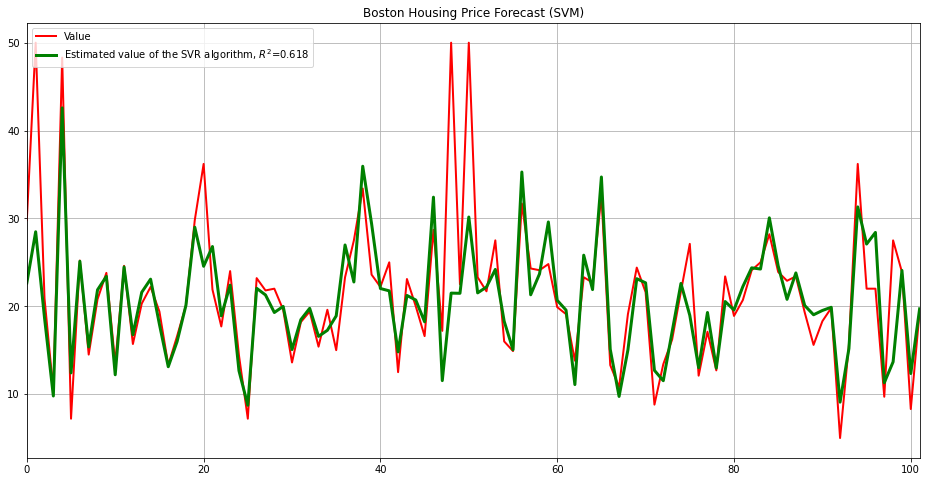

In [27]:
##Perform visualization.
ln_x_test = range(len(x_test))
y_predict = model.predict(x_test)
#Set the canvas.
plt.figure(figsize=(16, 8), facecolor='w')
#Draw with a red solid line.
plt.plot(ln_x_test, y_test, 'r-', lw=2, label=u'Value')
#Draw with a green solid line.
plt.plot(ln_x_test, y_predict, 'g-', lw=3, label=u'Estimated value of the SVR algorithm, $R^2$=%.3f' %
                                                 r2_score(y_test, model.predict(x_test)))
#Display in a diagram.
plt.legend(loc='upper left')
plt.grid(True)
plt.title(u"Boston Housing Price Forecast (SVM)")
plt.xlim(0, 101)
plt.show()

E se aplicarmos o modelo sobre os dados de treinamento? Resultado do modelo é mais próximo do esperado, o que não
quer dizer que o modelo é adequado, visto que pode estar viciado no conjunto de dados usado para treinamento.

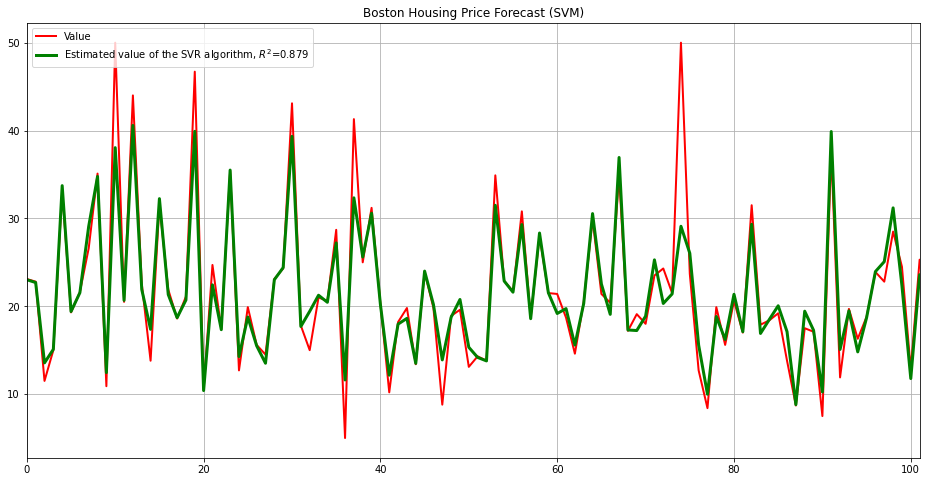

In [28]:
##Perform visualization.
ln_x_train = range(len(x_train))
y_predict = model.predict(x_train)
#Set the canvas.
plt.figure(figsize=(16, 8), facecolor='w')
#Draw with a red solid line.
plt.plot(ln_x_train, y_train, 'r-', lw=2, label=u'Value')
#Draw with a green solid line.
plt.plot(ln_x_train, y_predict, 'g-', lw=3, label=u'Estimated value of the SVR algorithm, $R^2$=%.3f' %
                                                  r2_score(y_train, model.predict(x_train)))
#Display in a diagram.
plt.legend(loc='upper left')
plt.grid(True)
plt.title(u"Boston Housing Price Forecast (SVM)")
plt.xlim(0, 101)
plt.show()